# iLQR Example: Cart Pole

## Load Packages 

In [1]:
using Plots; #gr(); pylot()
using LinearAlgebra
using BenchmarkTools

## Load Julia Files

In [2]:
include("../src/models/CartPole.jl")
include("../src/utils.jl")
include("../src/ilqr-problem.jl")
include("../src/ilqr-alg.jl")
;

## Define the model

In [3]:
model = CartPole();

### initialize trajectory

In [4]:
X_init, U_init = initialize_trajectory(model,model.tN)
T = LinRange(0, model.tN*model.dt, model.tN)
;

### plot initial trajectory

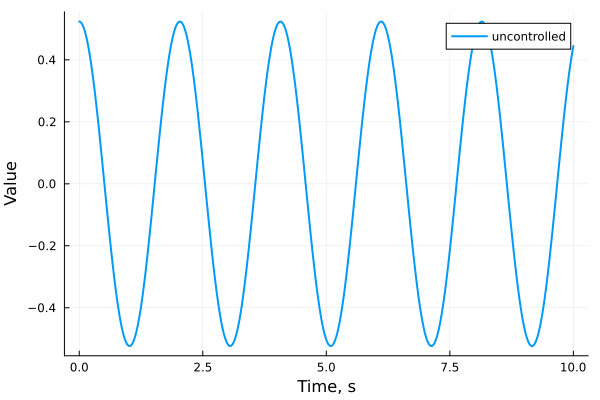

In [5]:
plot(T, X_init[3,:], color=:auto,linestyle=:solid,label="uncontrolled",linewidth=2)
plot!(xlabel="Time, s",ylabel="Value",legend=:best)

## Define iLQR problem

In [6]:
problem = iLQRProblem(model);

## Solve the optimal control problem

In [7]:
tN = model.tN
max_ite = model.max_ite

X, U = solve_ilqr(model, problem, tN, max_ite, print=true)
;

> Solve iLQR Problem 

------------------------------------------------
iter   || cost   
------------------------------------------------

1  ||  399.98789875471584 

2  ||  232.186218095853 

3  ||  176.87124700505908 

4  ||  103.75078353377003 

5  ||  75.12217150826893 

------------------------------------------------
iter   || cost   
------------------------------------------------

6  ||  59.30229093933381 

7  ||  14.275929536060891 

8  ||  3.166959649651974 

9  ||  2.8756225372006092 

10  ||  2.228585166580658 

------------------------------------------------
>>> iLQR Iterations Finished <<<
total iterations: 10
cost: 2.0498356958391155
cost threshold: 0.08720185286283154
--------------------------------



## Plot retults

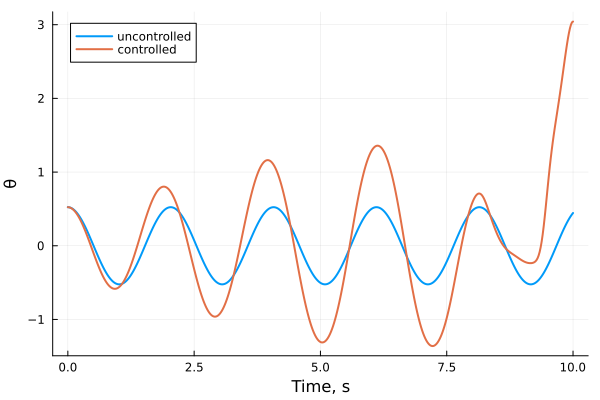

In [8]:
plot(T, X_init[3,:], color=:auto,linestyle=:solid,label="uncontrolled",linewidth=2)
plot!(T, X[3,:], color=:auto,linestyle=:solid,label="controlled",linewidth=2)
# plot!(T,X[1,:], color=:auto,linestyle=:solid,label=L"p~ \textrm{controlled}",linewidth=2)
plot!(xlabel="Time, s",ylabel="θ",legend=:best)

In [9]:
@btime solve_ilqr(model, problem, tN, max_ite, print=true)

> Solve iLQR Problem 

------------------------------------------------
iter   || cost   
------------------------------------------------

1  ||  399.98789875471584 

2  ||  284.32690767325795 

3  ||  182.5578878259448 

4  ||  85.15300792808041 

5  ||  35.21663533476951 

------------------------------------------------
iter   || cost   
------------------------------------------------

6  ||  15.478562267217312 

7  ||  14.24959331620686 

8  ||  12.898616729806232 

9  ||  12.202937084734998 

10  ||  12.036043031361286 

------------------------------------------------
>>> iLQR Iterations Finished <<<
total iterations: 10
cost: 11.325722728028307
cost threshold: 0.06271743714642738
--------------------------------

> Solve iLQR Problem 

------------------------------------------------
iter   || cost   
------------------------------------------------

1  ||  399.98789875471584 

2  ||  284.33485934924784 

3  ||  182.5820559415564 

4  ||  85.27996464173367 

5  ||  35.68537726

([0.0 0.00026695018652894394 … -0.3850660340761256 -0.37035705278460906; 0.0 0.02669511049089276 … 1.3663646150604634 0.10454504044158264; 0.5235987755982988 0.5223869063425146 … 3.1784474551918107 3.195675139936139; 0.0 -0.12115535894882155 … 1.4872768185479832 0.23623139983444985], [1.2956046108970847 1.2489161234367165 … -61.558732166729364 -63.096702176211345; 0.0 0.0 … 0.0 0.0])